In [5]:
#
# Modelo predador-presa 
# Na ausência de predadores, a população de presas obedece a uma equação logística.
#
# Esse exemplo foi retirado da "Recitation 6" do curso Differential Equations 2x2 Systems do MIT no EdX.
# Uma parte dos scripts foi extraída do seguinte endereço: https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
#
# Será utilizado o método de Runge-Kutta de 4ª ordem para resolver o sistema de equações diferenciais.
#

In [4]:
import numpy as np
import pylab as p
from numpy.linalg import eig

In [6]:
Delta_t   = 0.0010
t_init    = 0.0
t_end     = 40
num_steps = int((t_end - t_init) / Delta_t)
ttot      = np.linspace(t_init, t_end, num_steps)

### Sistema

O exemplo trata de uma hipotética interação entre veados (deers) e lobos (wolfs). Onde os veados são as presas e o lobos são os predadores. Quando uma presa e um predador se encontram, há perda para o número de presas e ganho para o número de predadores. O sistema de equações diferenciais de primeira ordem que rege essa interação é o seguinte:

$\frac{dx}{dt} = 3x - x^2 - xy$

$\frac{dy}{dt} = y - y^2 + xy$

Onde $x$ é o número de presas e $y$ é o número de predadores.

Os pontos de equilíbrio desse sistema, quando ambas as equações diferenciais se igualam a zero, são os seguintes:

. $(0,0), (0,1), (3,0)$ e $(1,2)$

Como primeiro exercício, vamos verificar a estabilidade de cada um desses pontos de equilíbrio, o que é feito calculando-se os autovalores do jacobiano em cada um dos pontos.

$G = \frac{dx}{dt} = 3x - x^2 - xy$

$H = \frac{dy}{dt} = y - y^2 + xy$

O Jacobiano é calculado da seguinte forma:

$
\mathbf{J} =
\begin{bmatrix}
  \frac{\partial G}{\partial R} & 
    \frac{\partial G}{\partial F} \\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial H}{\partial R} & 
    \frac{\partial H}{\partial F}  \\[1ex]
\end{bmatrix}
$

$
\mathbf{J} =
\begin{bmatrix}
  3 - 2x-y & 
    -x\\[1ex] % <-- 1ex more space between rows of matrix
  y & 
    1 - 2y +x  \\[1ex]
\end{bmatrix}
$

Vamos calcular os autovalores para cada um dos pontos críticos do sistema de equações diferenciais.

In [7]:
def Calc_eig_Jacobian(x,y):
    vector = np.array([[  3 - 2*x - y, -x],
                   [      y,  1 -2*y+x]])

    w,v = eig(vector)
    
    return w

In [8]:
eigens_1 = Calc_eig_Jacobian(0,0)
eigens_2 = Calc_eig_Jacobian(0,1)
eigens_3 = Calc_eig_Jacobian(3,0)
eigens_4 = Calc_eig_Jacobian(1,2)

print("Os autovalores do primeiro ponto crítico (0,0) são: ", eigens_1)
print("Os autovalores do segundo crítico (0,1) são: ", eigens_2)
print("Os autovalores do terceiro ponto crítico (3,0) são: ", eigens_3)
print("Os autovalores do quarto ponto crítico (1,2) são: ", eigens_4)

Os autovalores do primeiro ponto crítico (0,0) são:  [3. 1.]
Os autovalores do segundo crítico (0,1) são:  [-1.  2.]
Os autovalores do terceiro ponto crítico (3,0) são:  [-3.  4.]
Os autovalores do quarto ponto crítico (1,2) são:  [-1.5+1.32287566j -1.5-1.32287566j]


Os três primeiros pontos de equilíbrio são instáveis. O primeiro é um nodal source, com ambos os autovalores positivos. Os dois seguintes são pontos de cela, com um autovalor positivo e outro negativo. O quarto ponto $(1,2)$ é um ponto estável, spiral sink. Na figura a seguir é mostrado o comportamento do sistema.

In [9]:
def dX_dt(x,y):
    vector = np.array([  3*x - x**2 - x*y,
                           y - y**2 + x*y])
    
    return vector

No handles with labels found to put in legend.


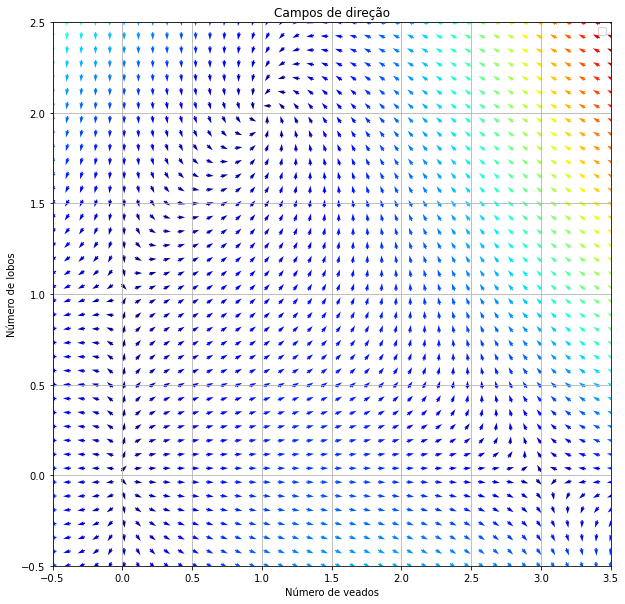

In [11]:
#-------------------------------------------------------
f2 = p.figure(figsize=(10,10))
#-------------------------------------------------------

nb_points   = 40
xmin = -0.5
xmax =  3.5
ymin = -0.5
ymax =  2.5

x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt(X1, Y1)                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Campos de direção')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Número de veados')
p.ylabel('Número de lobos')
p.legend()
p.grid()
p.xlim(xmin, xmax)
p.ylim(ymin, ymax)
f2.savefig('Veados_e_lobos_1.png')
#

Item a da recitação. Suponha-se que passe a ser fornecida complementação alimentar para os veados. De forma que o sistema de equações diferenciais passe a ser o seguinte:

$\frac{dx}{dt} = (3+k)x - x^2 - xy$

$\frac{dy}{dt} = y - y^2 + xy$

Onde $k$ representa o acréscimo alimentar. Vamos usar diversos valores de $k$ para vermos o comportamento das populações de veados e lobos. Isso será visto retratos de fase (phase portrait) do sistema para cada valor de $k$, para uma mesma condição inicial (e.g. 5 veados e 5 lobos). 

In [14]:
def dX_dt_alter(x,y,k):
    vector = np.array([  (3+k)*x - x**2 - x*y,
                           y - y**2 + x*y])
    
    return vector

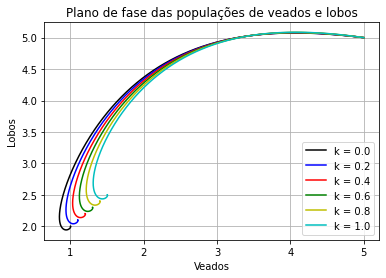

In [27]:
#
#  Nesse terceiro experimento, há predadores e presas, com diferentes condições iniciais. 
#
# x - veados
# y - lobos
#
K = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

X_init = [5,5]

Cores  = ['k-', 'b-','r-','g-','y-','c-']
Labels = ['k = 0.0', 'k = 0.2', 'k = 0.4','k = 0.6','k = 0.8','k = 1.0']


f1 = p.figure()

for i in range(len(K)):
    
    k = K[i]
    
    X = np.array([5])
    Y = np.array([5])

    for t in range(1, num_steps):
        factors = dX_dt_alter(X[t-1],Y[t-1],k)

        xnew = X[t-1] + factors[0]*Delta_t
        ynew = Y[t-1] + factors[1]*Delta_t
    
        X = np.append(X, xnew)
        Y = np.append(Y, ynew)

        rabbits = X
        foxes   = Y

    p.plot(rabbits, foxes, Cores[i], label= Labels[i])
        
p.grid()
p.legend(loc='best')
p.xlabel('Veados')
p.ylabel('Lobos')
p.title('Plano de fase das populações de veados e lobos')
f1.savefig('Veados_e_lobos_3.png')

Como se pode ver, a cada aumento no valor da complementação alimentar $k$, o ponto de equlíbrio entre veados e lobos aumenta.

Agora vamos fazer o contrário. Reduzir a quantidade de alimento dos veados e ver o que ocorre com as duas populações de animais.

De forma que o sistema de equações diferenciais passe a ser o seguinte:

$\frac{dx}{dt} = (3-k)x - x^2 - xy$

$\frac{dy}{dt} = y - y^2 + xy$

Onde $k$ representa o decréscimo alimentar. Vamos usar diversos valores de $k$ para vermos o comportamento das populações de veados e lobos. Isso será visto retratos de fase (phase portrait) do sistema para cada valor de $k$, para uma mesma condição inicial (e.g. 5 veados e 5 lobos). 

In [23]:
def dX_dt_alter_2(x,y,k):
    vector = np.array([  (3-k)*x - x**2 - x*y,
                           y - y**2 + x*y])
    
    return vector

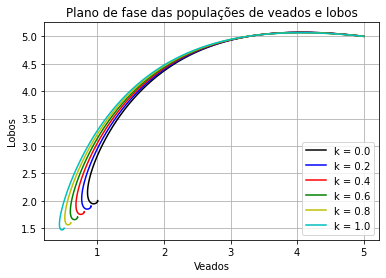

In [26]:
#
#  Nesse terceiro experimento, há predadores e presas, com diferentes condições iniciais. 
#
# x - veados
# y - lobos
#
K = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

X_init = [5,5]

Cores  = ['k-', 'b-','r-','g-','y-','c-']
Labels = ['k = 0.0', 'k = 0.2', 'k = 0.4','k = 0.6','k = 0.8','k = 1.0']


f1 = p.figure()

for i in range(len(K)):
    
    k = K[i]
    
    X = np.array([5])
    Y = np.array([5])

    for t in range(1, num_steps):
        factors = dX_dt_alter_2(X[t-1],Y[t-1],k)

        xnew = X[t-1] + factors[0]*Delta_t
        ynew = Y[t-1] + factors[1]*Delta_t
    
        X = np.append(X, xnew)
        Y = np.append(Y, ynew)

        rabbits = X
        foxes   = Y

    p.plot(rabbits, foxes, Cores[i], label= Labels[i])
        
p.grid()
p.legend(loc='best')
p.xlabel('Veados')
p.ylabel('Lobos')
p.title('Plano de fase das populações de veados e lobos')
f1.savefig('veados_e_lobos_4.png')

Com a progressiva redução do alimento, $k$, qual a primeira espécie que vai se extinguir? Suponha que a variação de $k$ é $0.01$. 

Da última figura, verificamos que com $k = 1.0$ ambas as espécies ainda não estão extintas. Assim, vamos estudar õ comportamento das populações frente à variação de $k$ a partir de $1.0$.

In [43]:
#
K = np.linspace(1.0, 3.0, 100)

X_init = [5,5]

fim = False

for i in range(len(K)):
    
    k = K[i]
    
    X = np.array([5])
    Y = np.array([5])

    for t in range(1, num_steps):
        factors = dX_dt_alter_2(X[t-1],Y[t-1],k)

        xnew = X[t-1] + factors[0]*Delta_t
        ynew = Y[t-1] + factors[1]*Delta_t
    
        X = np.append(X, xnew)
        Y = np.append(Y, ynew)
                
        if(abs(xnew) <= 0.001):
            print("Veados se extinguem primeiro com k = ",k)
            fim = True
            break
        elif(abs(ynew) <= 0.001):
            print("Lobos se extinguem primeiro com k = ",k)
            fim = True
            break
            
    if(fim):
        break

Veados se extinguem primeiro com k =  2.090909090909091
